In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.cross_validation as cv
from sklearn.linear_model import Lasso

%matplotlib inline


class hPrice():
    def __init__(self, data_path):
        self.house = pd.read_csv(data_path)
        self.house_clean = self.preprocess() 
    
    def preprocess(self):
        house_clean = self.house.rename(index=str, columns={"Avg. Area Income": "income", "Avg. Area House Age": "age", "Avg. Area Number of Rooms": "rooms", "Avg. Area Number of Bedrooms": "beds"})
        house_clean[['income','age','rooms','beds','Area Population','Price']] = house_clean[['income','age','rooms','beds','Area Population','Price']].astype('int64')
        house_clean = house_clean.drop('Address',axis= 1)
        return house_clean
        
    def train_test_split(self):
        X = self.house_clean.drop('Price', axis = 1)
        y = self.house_clean['Price']
        return train_test_split(X, y, test_size=0.30,random_state= 9)
    
    def model(self,X_train, y_train, X_test, y_test):
        lassocv = linear_model.LassoCV(cv =10,max_iter=10000)
        lassocv.fit(X_train, y_train)
        lassocv_score = lassocv.score(X_train, y_train)

        self.lassocv_alpha = lassocv.alpha_
        # print('CV', lassocv.coef_)

        self.lassoreg = Lasso(alpha=self.lassocv_alpha)
        self.lassoreg.fit(X_train,y_train)
        y_pred_lasso = self.lassoreg.predict(X_test)
        self.lasso_coef = self.lassoreg.coef_
        self.rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
        self.r2 = r2_score(y_test, y_pred_lasso)
        print("Root Mean squared error: %.2f" %self.rmse)
        print("R2: %.2f" %self.r2)
        

        return y_pred_lasso
    
    def exploratory(self,house_clean):
        #house_clean = self.house_clean
        plt.hist(house_clean['Price'], bins='auto')  # arguments are passed to np.histogram
        plt.title("Histogram of price")
        plt.show()
        plt.hist(house_clean['income'], bins='auto')  # arguments are passed to np.histogram
        plt.title("Histogram of income")
        plt.show()
        plt.scatter(house_clean['Price'], house_clean['income'], alpha=0.2)
        plt.xlabel("Price")
        plt.ylabel("income");
        plt.scatter(house_clean['Price'], house_clean['Area Population'], alpha=0.2)
        plt.xlabel("Price")
        plt.ylabel("Area");
        plt.scatter(house_clean['beds'], house_clean['Price'], alpha=0.2)
        plt.xlabel("Beds")
        plt.ylabel("Price");
        house_clean.boxplot(column='Price', by='beds')
        house_clean.boxplot(column='Price', by='age')
        
        return house_clean
    
    def linear_mod(self, X_train, y_train, X_test, y_test):
        regr = linear_model.LinearRegression()
        regr.fit(X_train, y_train)
        y_pred_linear = regr.predict(X_test)
        self.linear_coef = regr.coef_
        self.rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
        self.r2_linear = r2_score(y_test, y_pred_linear)
        print("Root Mean squared error: %.2f" %self.rmse_linear)
        print("R2: %.2f" %self.r2_linear)
        
        
        return y_pred_linear


In [92]:
houseP = hPrice(r'C:\Users\Praneeth Tamvada\Downloads\USA_Housing.csv')

In [93]:
X_train, X_test, y_train, y_test = houseP.train_test_split()

In [94]:
Lasso_model = houseP.model(X_train, y_train, X_test,y_test) # not explaining much varience may be because of significant variables are forced to zero because of regularization parameter.  

Root Mean squared error: 229333.26
R2: 0.58


In [95]:
linear_model = houseP.linear_mod(X_train, y_train, X_test,y_test) # Linear reg is performing well because the data is normally distributed and the relationship is linear

Root Mean squared error: 115488.48
R2: 0.89


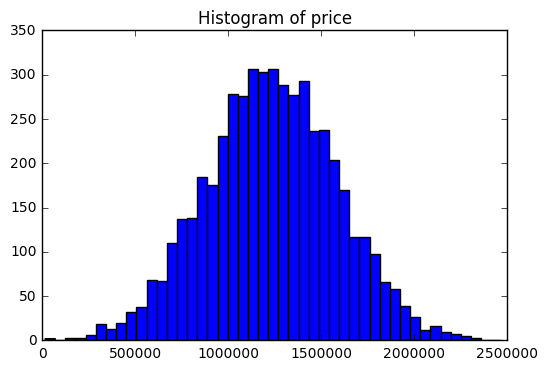

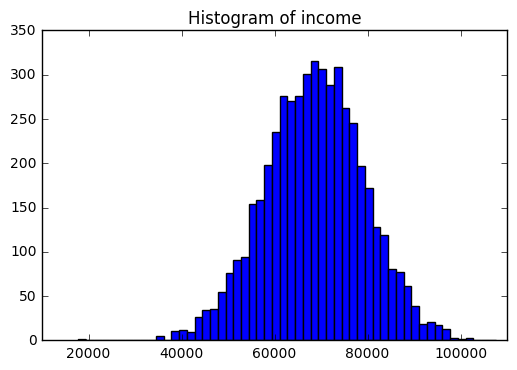

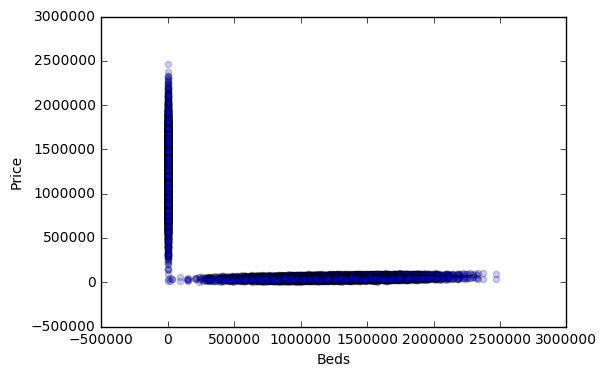

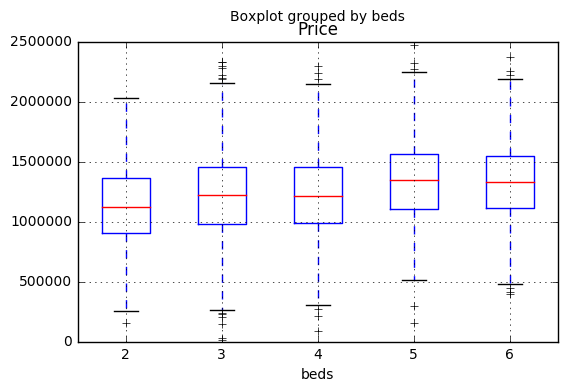

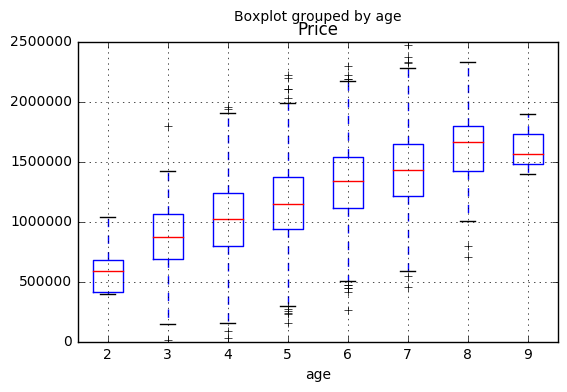

In [90]:
explo = houseP.exploratory(houseP.house_clean)